In [2]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# 将数据分为训练集和测试集
X=np.load('gpt3emb.npy')
y=np.load('y.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 创建LightGBM分类器
clf = lgb.LGBMClassifier()

# 设置要搜索的参数范围
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

# 创建GridSearchCV对象
grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found by grid search are:", grid.best_params_)

# 使用最佳参数的模型进行预测
y_pred = grid.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 打印分类报告
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

[LightGBM] [Info] Number of positive: 11398, number of negative: 12542
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.144629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 391680
[LightGBM] [Info] Number of data points in the train set: 23940, number of used features: 1536
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476107 -> initscore=-0.095645
[LightGBM] [Info] Start training from score -0.095645
[LightGBM] [Info] Number of positive: 11399, number of negative: 12542
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.216512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 391680
[LightGBM] [Info] Number of data points in the train set: 23941, number of used features: 1536
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476129 -> initscore=-0.095557
[LightGBM] [Info] Start training from score -0.095557
[Lig

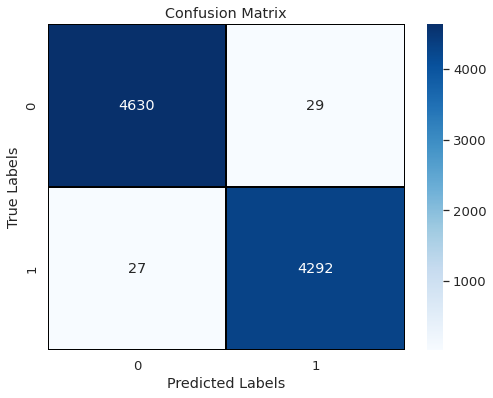

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建热图
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=2, linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X=np.load('gpt3emb.npy')
y=np.load('y.npy')
# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 创建SVC模型
svc_model = SVC()

# 训练模型
svc_model.fit(X_train, y_train)

# 预测
y_pred = svc_model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 打印分类报告
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9992203163288037
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4654
           1       1.00      1.00      1.00      4324

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978



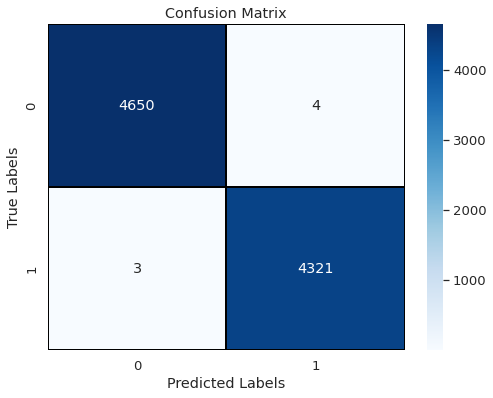

In [7]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建热图
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=2, linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()